In [52]:
import pandas as pd

# read data
df = pd.read_csv('travel-time.csv')

# parse datetime as index
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])
df.set_index('datetime', inplace=True)
df.drop(columns=['date', 'time'], inplace=True)

# convert minutes to hours
df = df / 60

# add hour column
df['hour'] = df.index.hour
df['hour'] = df['hour'].apply(lambda x: f'{x:02d}:00')
df

,sz2sg,sg2sz,sz2sd,sd2sz,sg2sd,sd2sg,hour
datetime,,,,,,,
2024-02-10 08:31:00,4.266667,3.316667,2.533333,1.616667,3.466667,3.716667,08:00
2024-02-10 08:33:00,4.466667,3.300000,2.533333,1.633333,3.433333,3.666667,08:00
2024-02-10 10:00:00,5.116667,3.250000,3.883333,2.666667,1.983333,5.283333,10:00
2024-02-10 13:20:00,4.283333,3.216667,3.266667,2.250000,3.066667,3.833333,13:00
2024-02-10 14:00:00,4.350000,3.250000,3.466667,2.566667,3.233333,3.966667,14:00
...,...,...,...,...,...,...,...
2024-09-10 08:00:00,3.266667,3.450000,1.666667,1.683333,3.150000,3.050000,08:00
2024-09-10 10:00:00,3.550000,3.333333,1.650000,1.616667,3.033333,2.916667,10:00
2024-09-10 12:00:00,3.433333,3.383333,1.583333,1.583333,3.200000,2.866667,12:00


In [53]:
# calculate hourly average
hourly_avg = df.groupby('hour').mean()
hourly_avg

,sz2sg,sg2sz,sz2sd,sd2sz,sg2sd,sd2sg
hour,,,,,,
00:00,3.307143,3.421429,1.464286,1.707143,2.902381,2.792857
02:00,3.095238,3.252381,1.428571,1.409524,2.826190,2.764286
04:00,3.161905,3.283333,1.416667,1.404762,2.838095,2.778571
06:00,3.202381,3.390476,1.435714,1.395238,2.909524,2.761905
08:00,3.524074,3.416667,1.883333,1.581481,3.162963,3.088889
10:00,3.639583,3.479167,2.258333,1.916667,3.133333,3.445833
12:00,3.259524,3.676190,1.938095,1.726190,3.526190,2.954762
13:00,4.283333,3.216667,3.266667,2.250000,3.066667,3.833333
14:00,3.404167,3.947917,2.122917,2.141667,3.685417,3.200000


In [58]:
from matplotlib import pyplot as plt
import scienceplots
plt.style.use(['ieee'])

def analysis_plot(city1='sz', city2='sg'):
    # travel time curve
    df.plot(
        y=[f'{city1}2{city2}', f'{city2}2{city1}'],
        kind='line',
        title=f'Travel Time between {city1.upper()} and {city2.upper()}',
        xlabel='Date',
        ylabel='Time (h)',
        figsize=(5, 3),
        colormap='tab10',
    )
    plt.savefig(f'travel-time-{city1}-{city2}.pdf')
    plt.savefig(f'travel-time-{city1}-{city2}.png')
    plt.show()

    # hourly average
    hourly_avg.plot(
        y=[f'{city1}2{city2}', f'{city2}2{city1}'],
        kind='line',
        title=f'Averaged Travel Time by Hour of the Day between {city1.upper()} and {city2.upper()}',
        xlabel='Hour of the Day',
        ylabel='Average Time (h)',
        figsize=(5, 3),
        colormap='tab10',
    )
    plt.savefig(f'travel-time-by-hour-{city1}-{city2}.pdf')
    plt.savefig(f'travel-time-by-hour-{city1}-{city2}.png')
    plt.show()

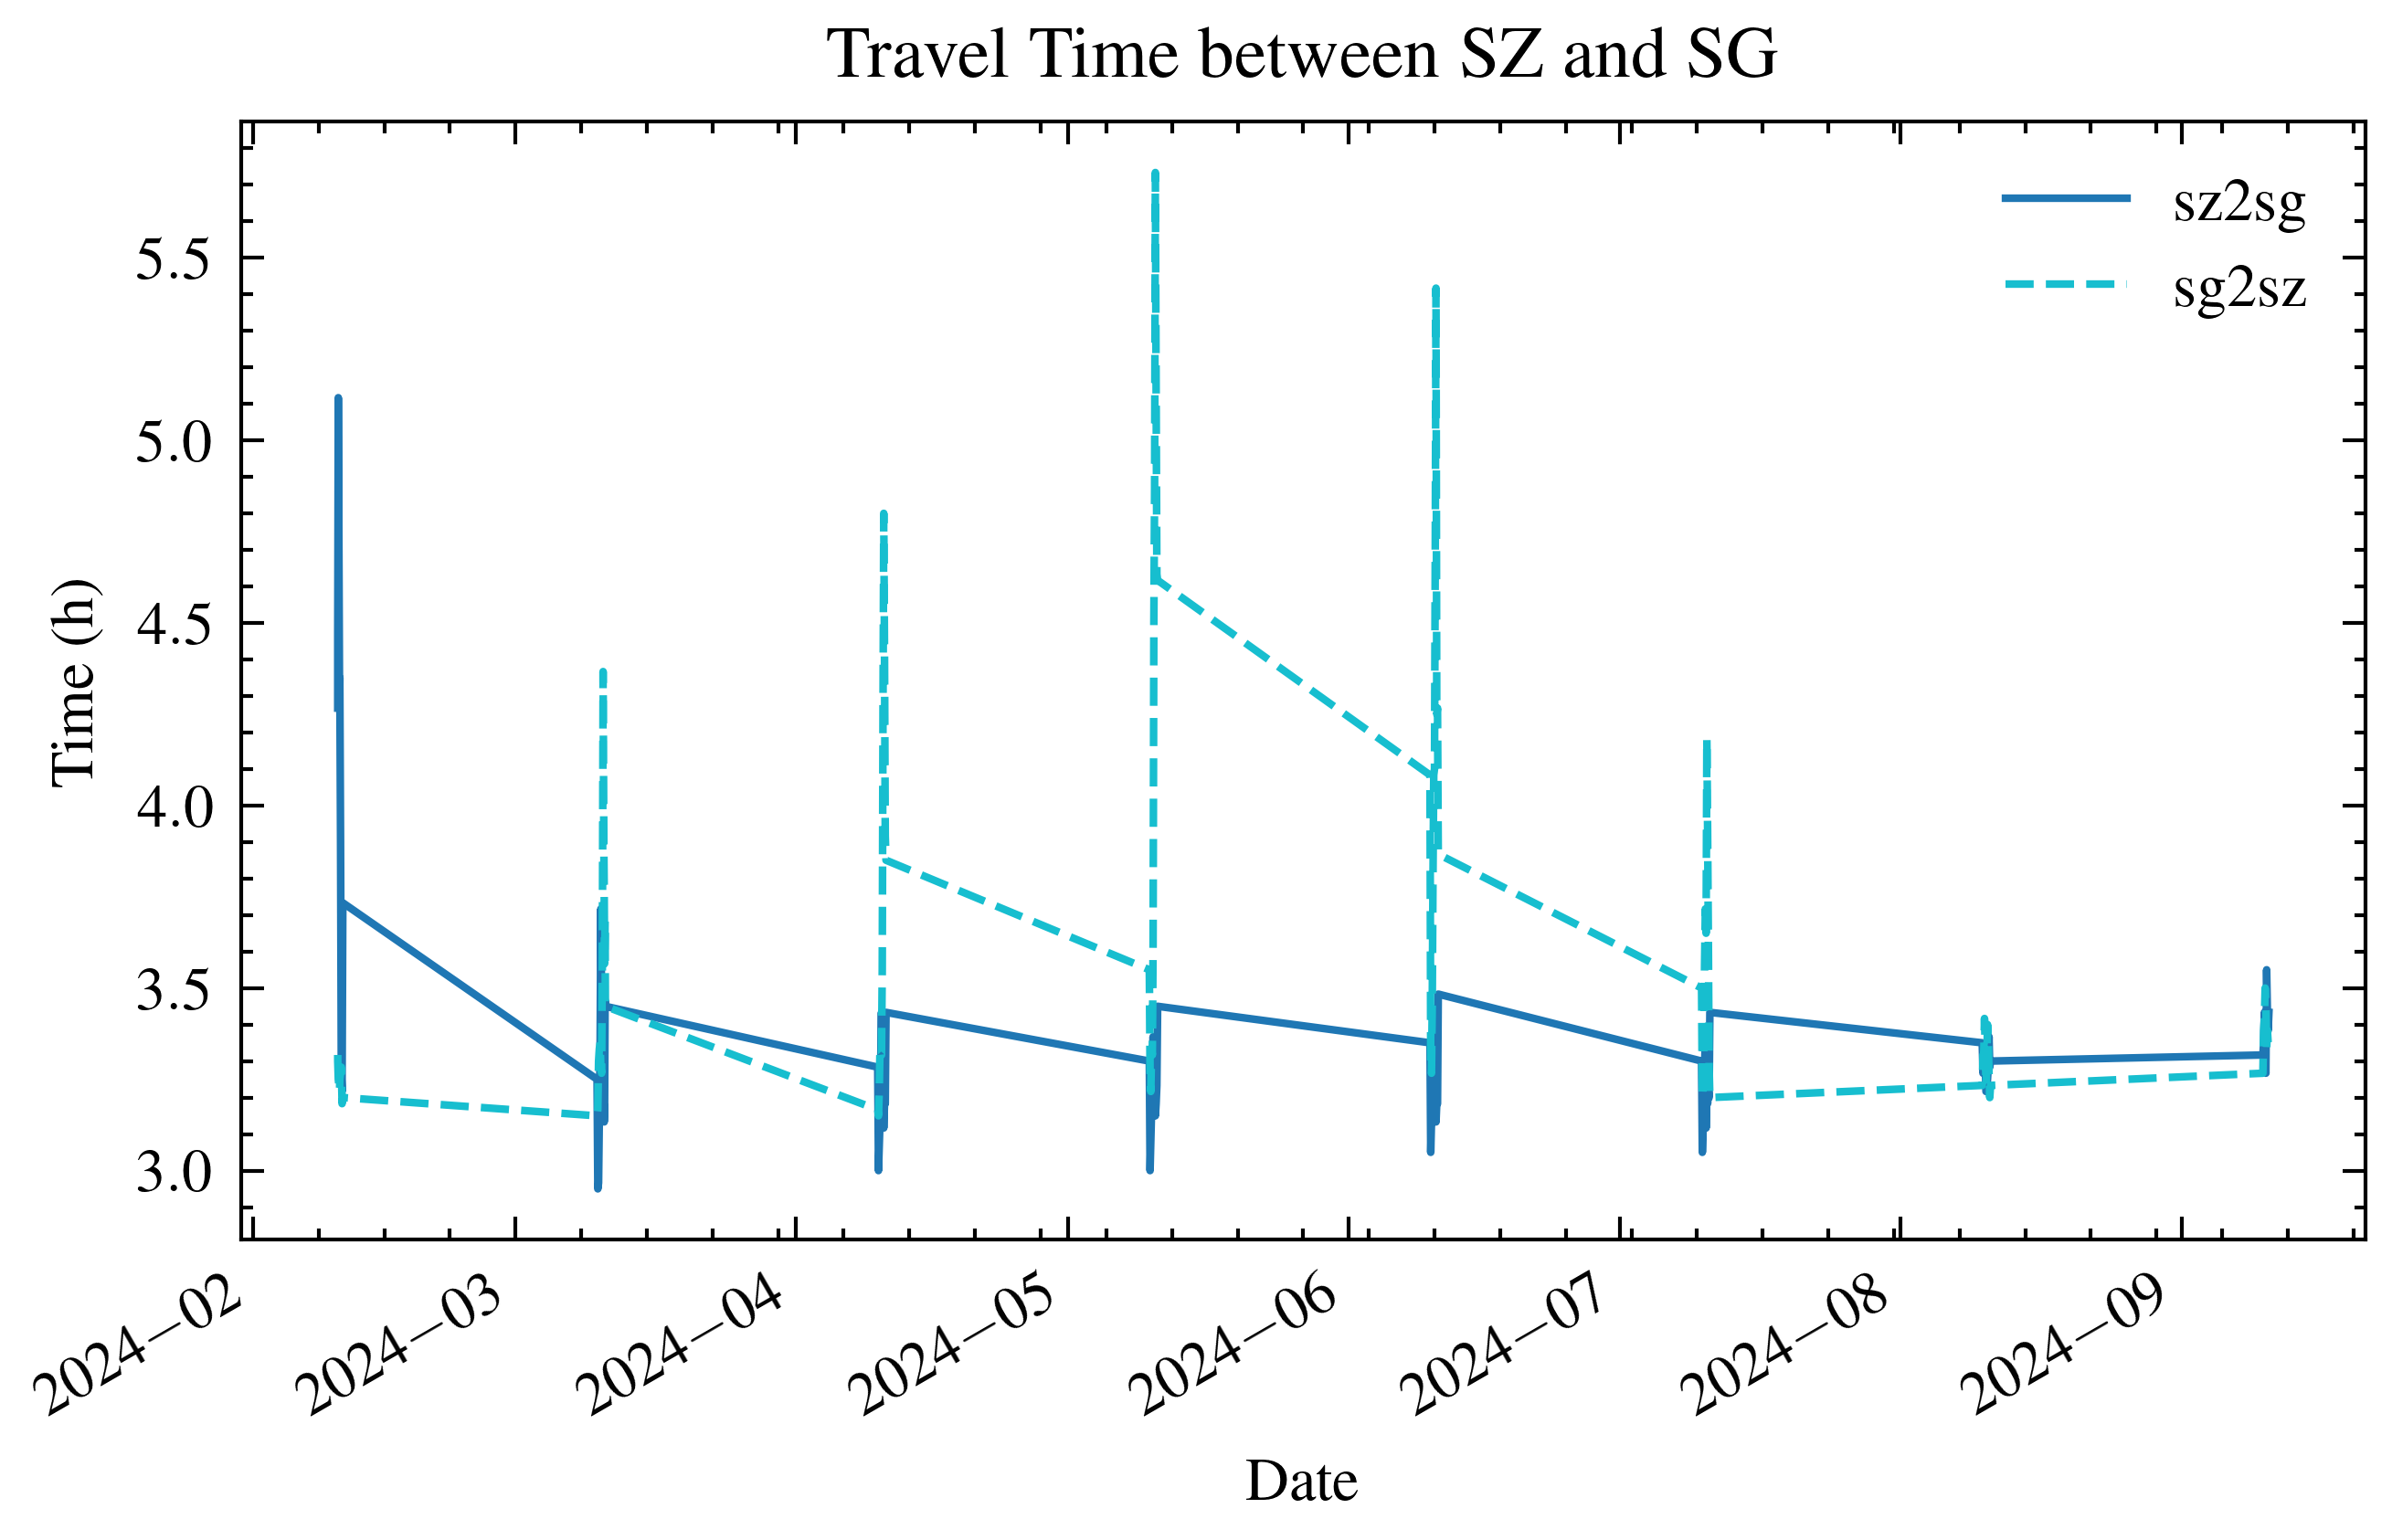

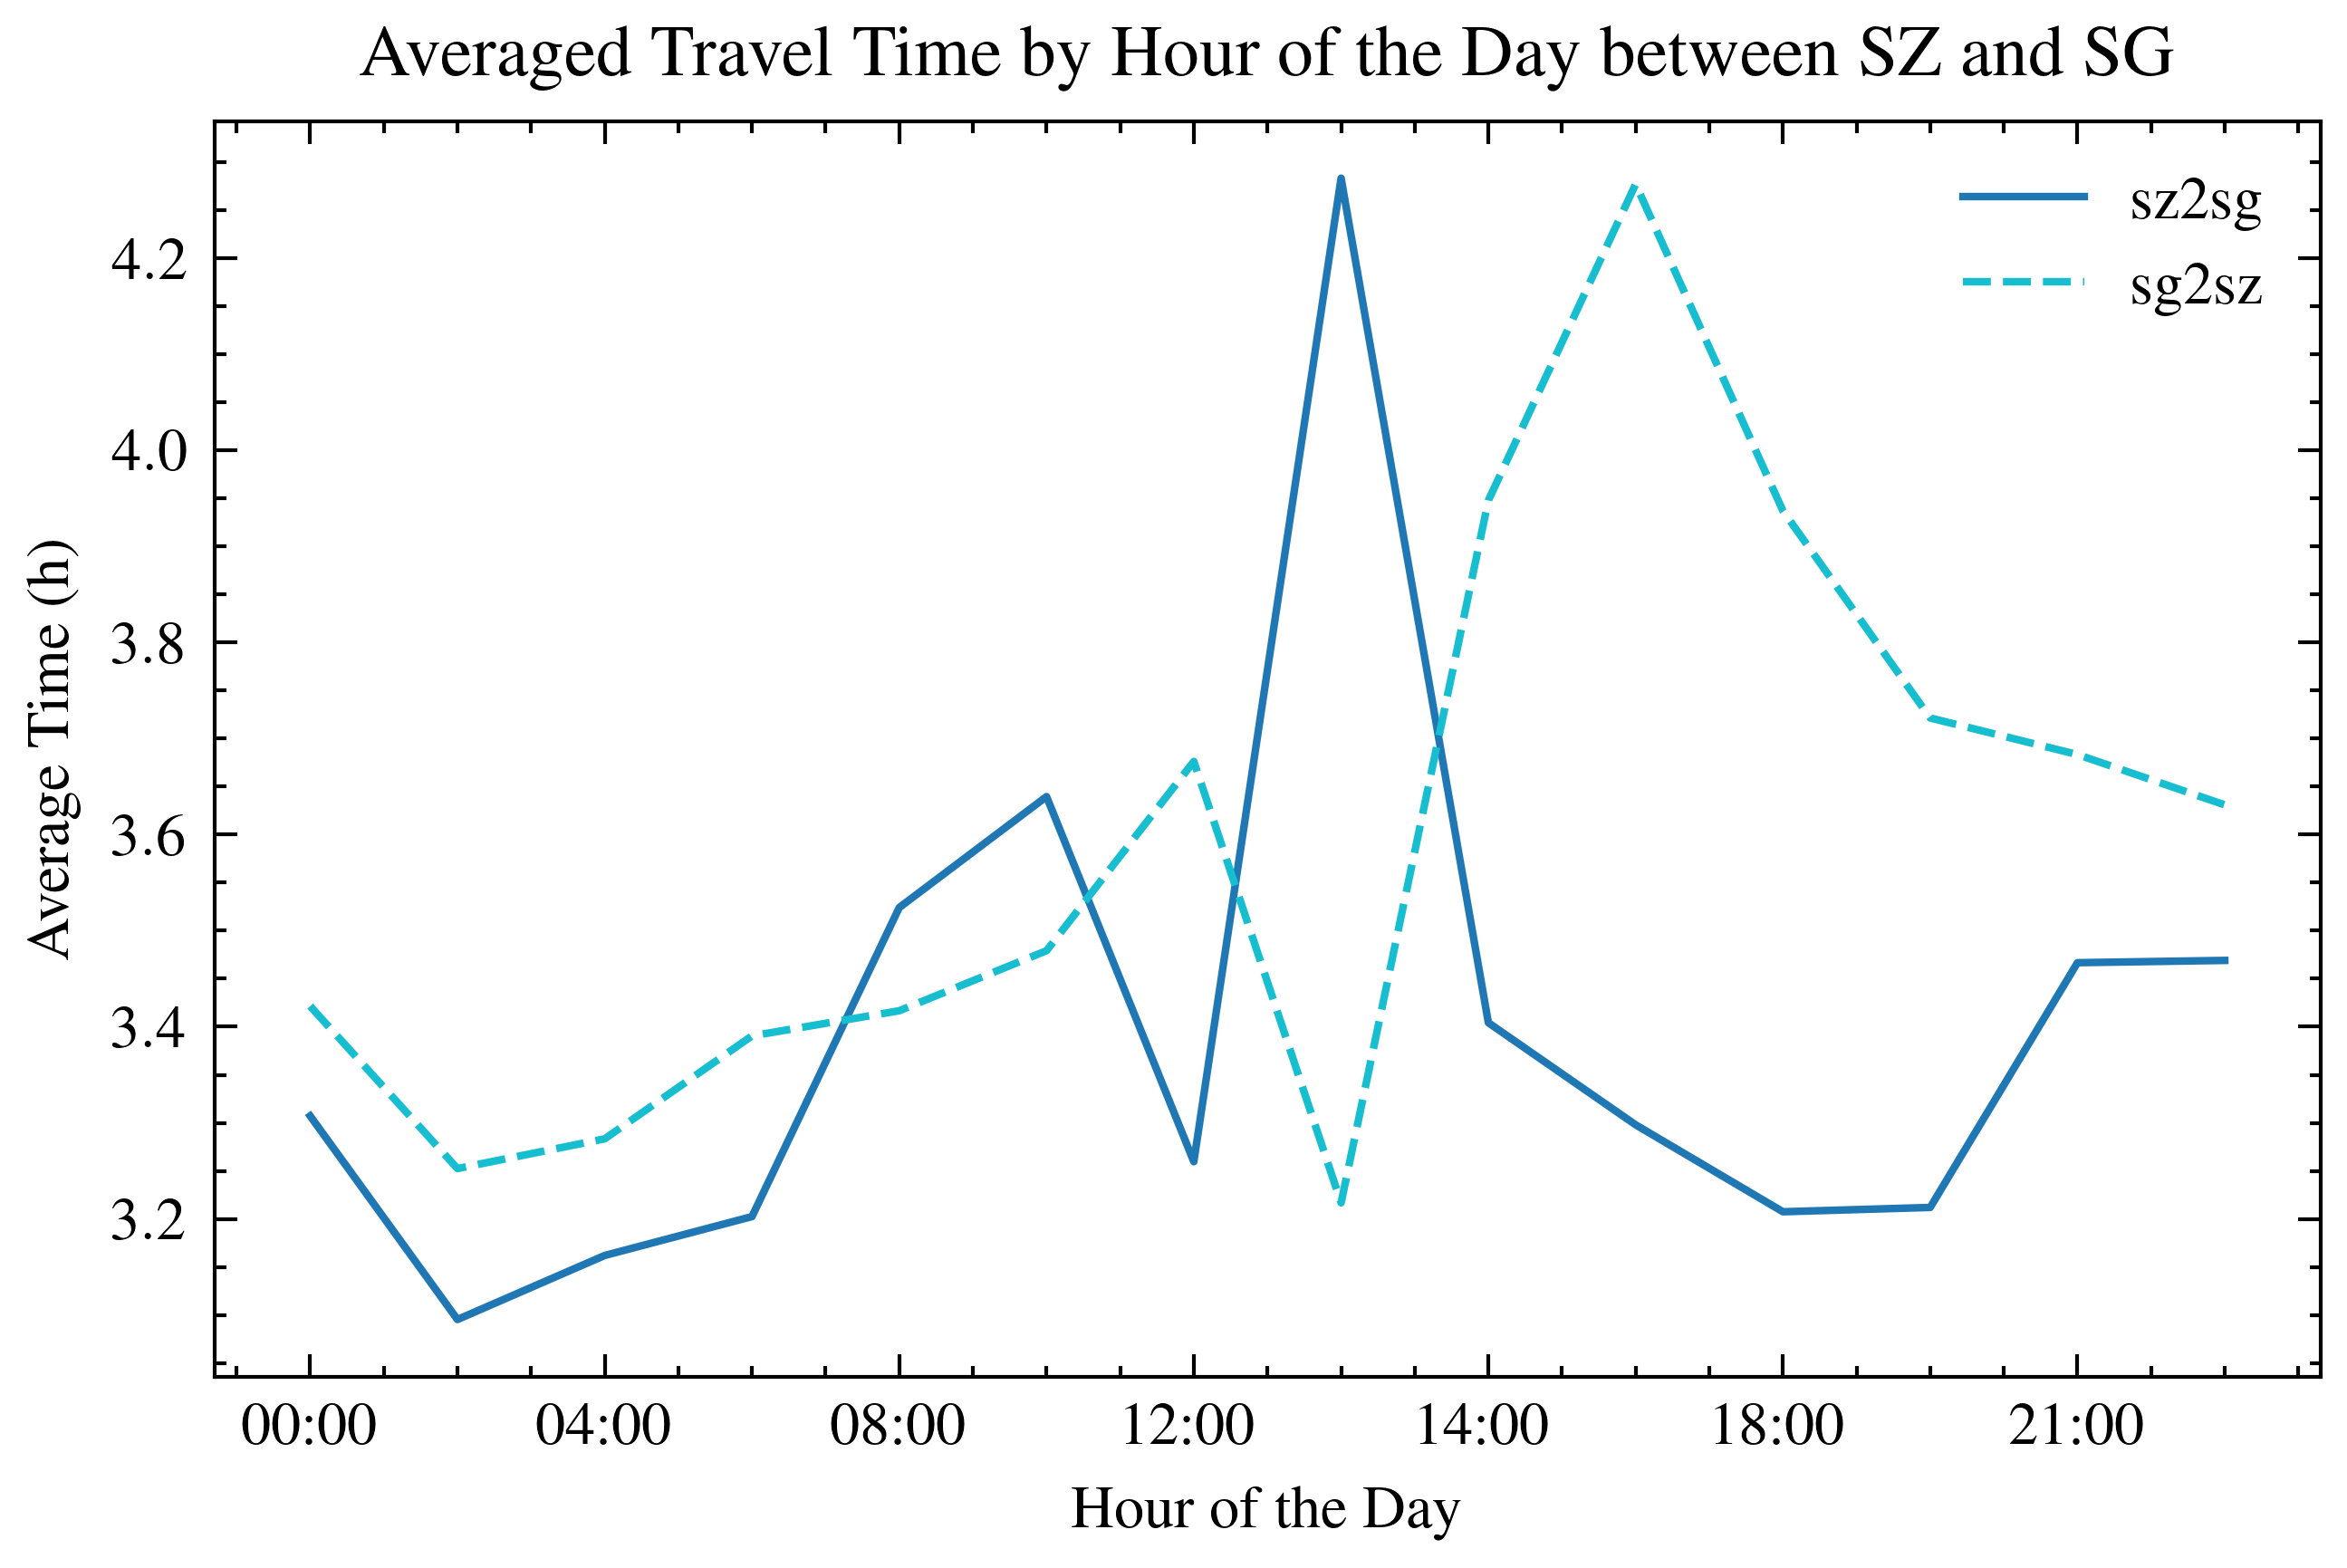

In [59]:
analysis_plot('sz', 'sg')

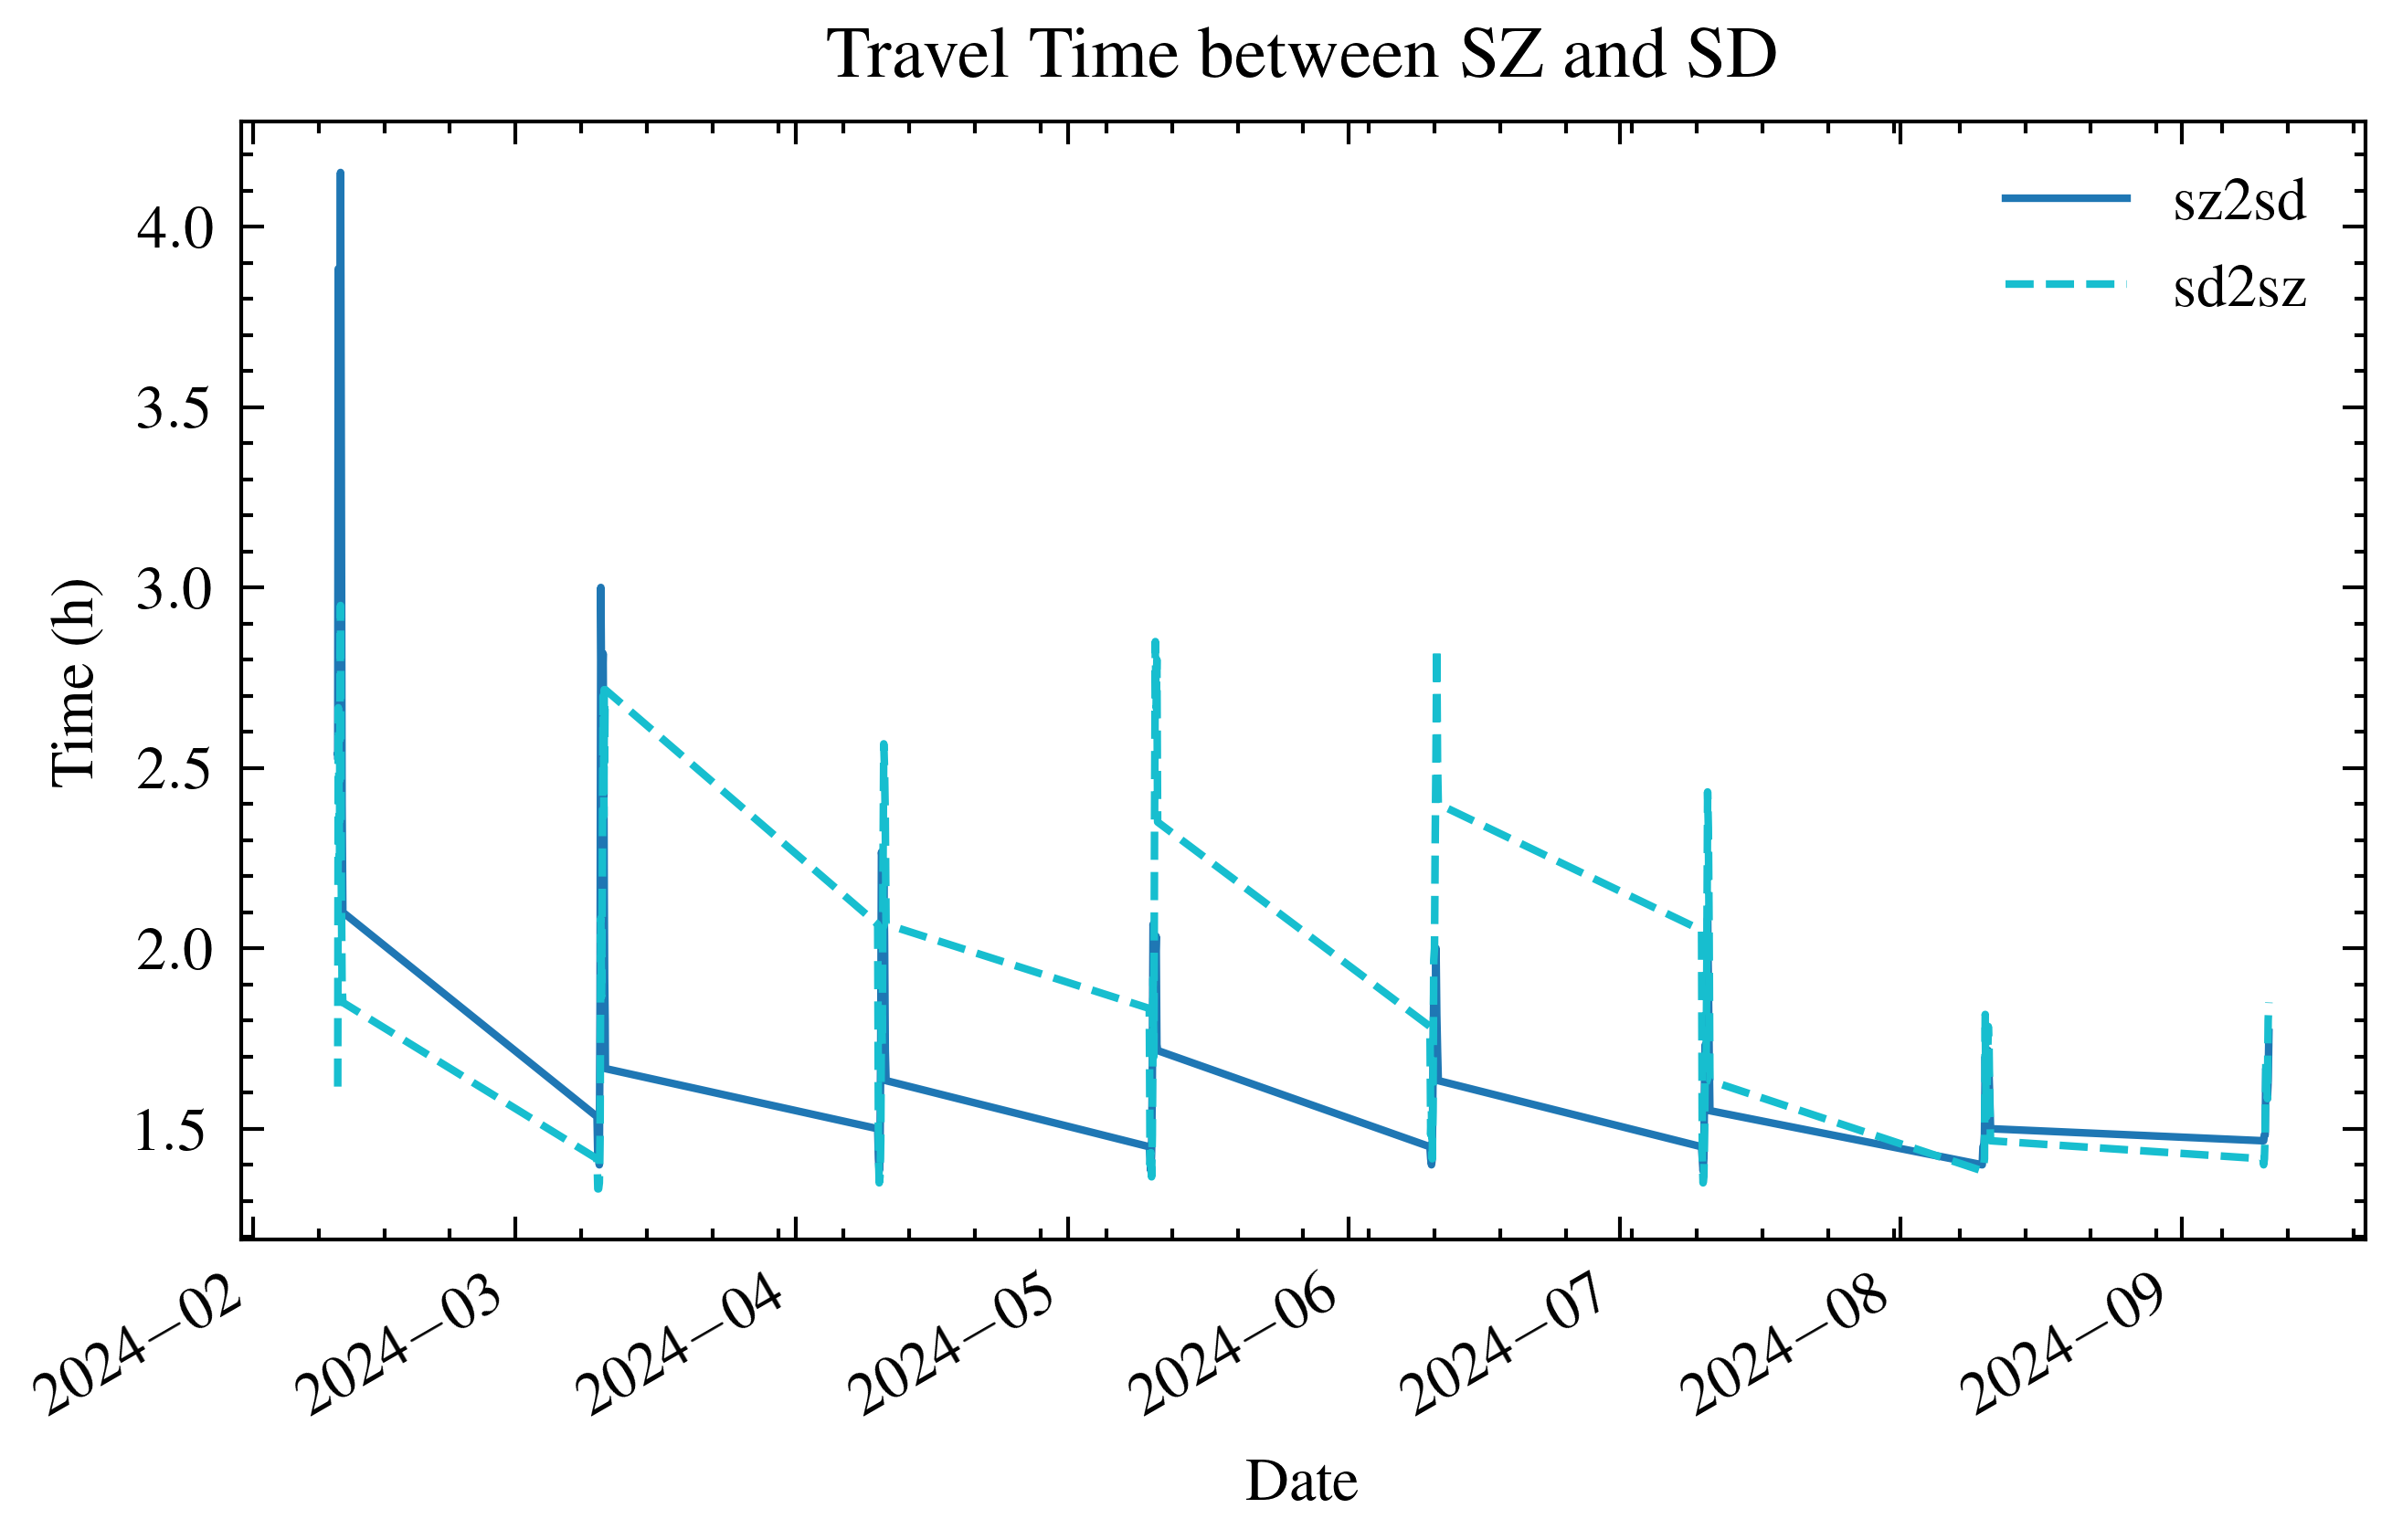

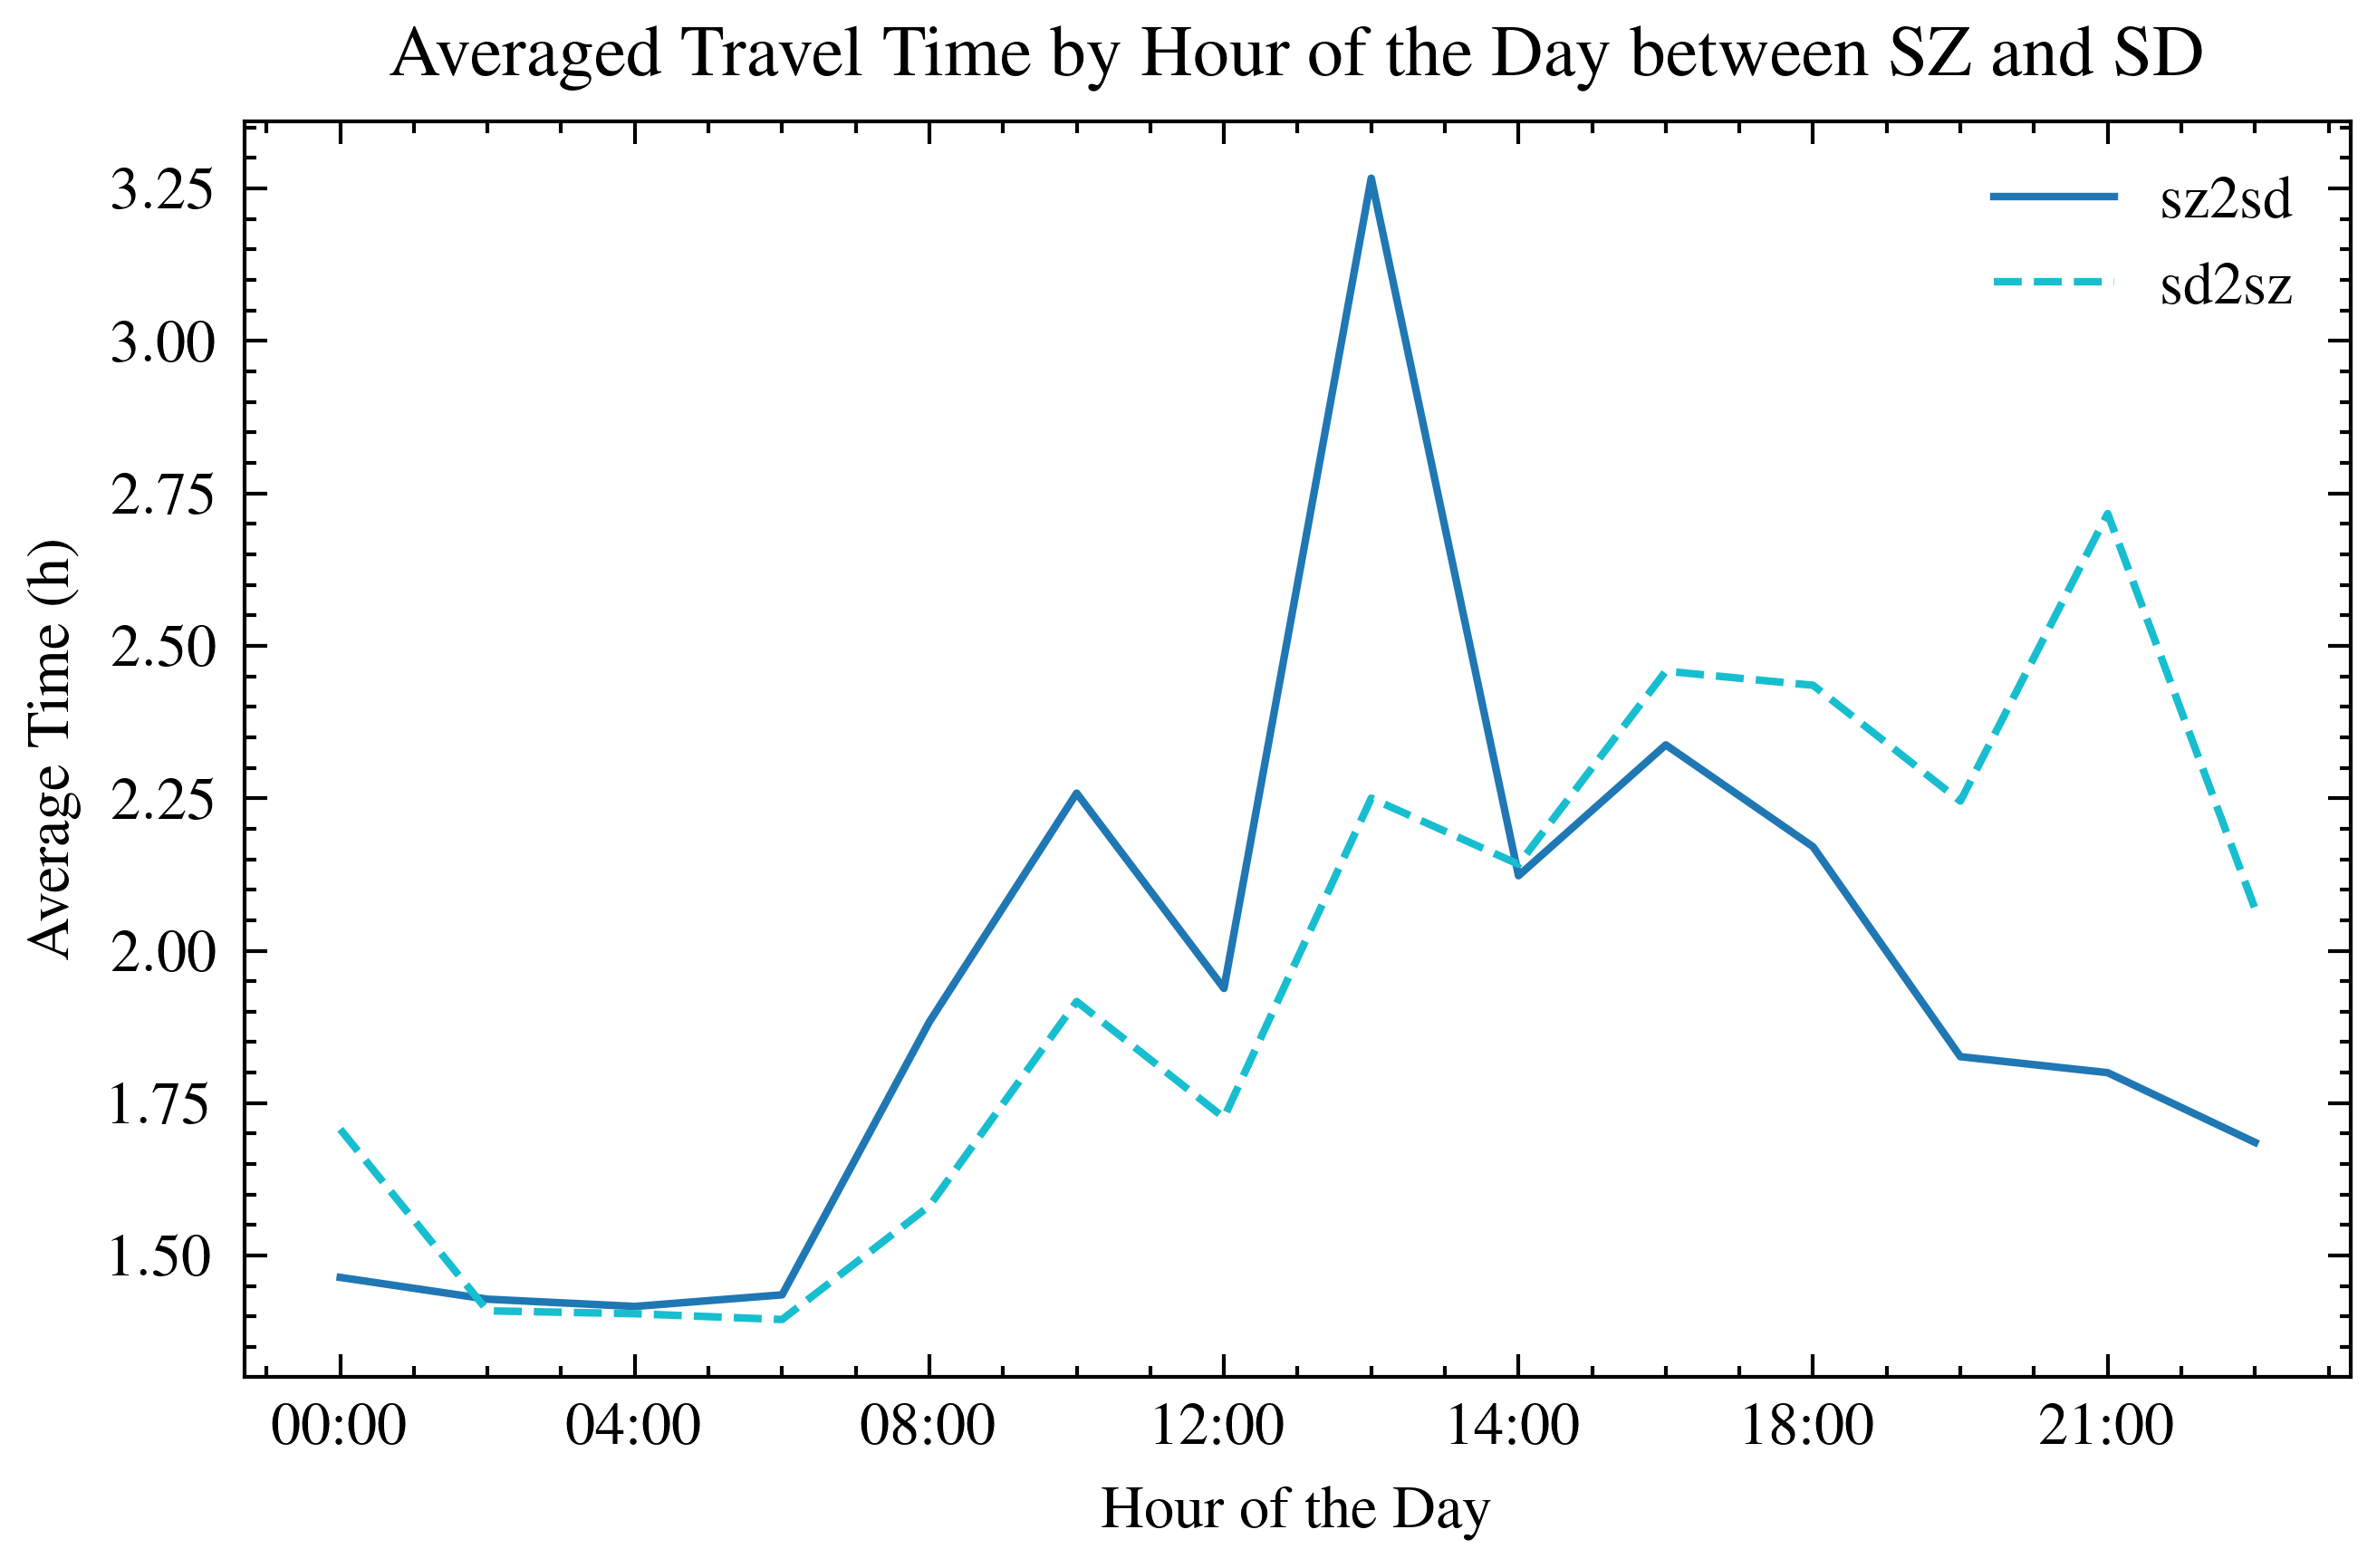

In [60]:
analysis_plot('sz', 'sd')

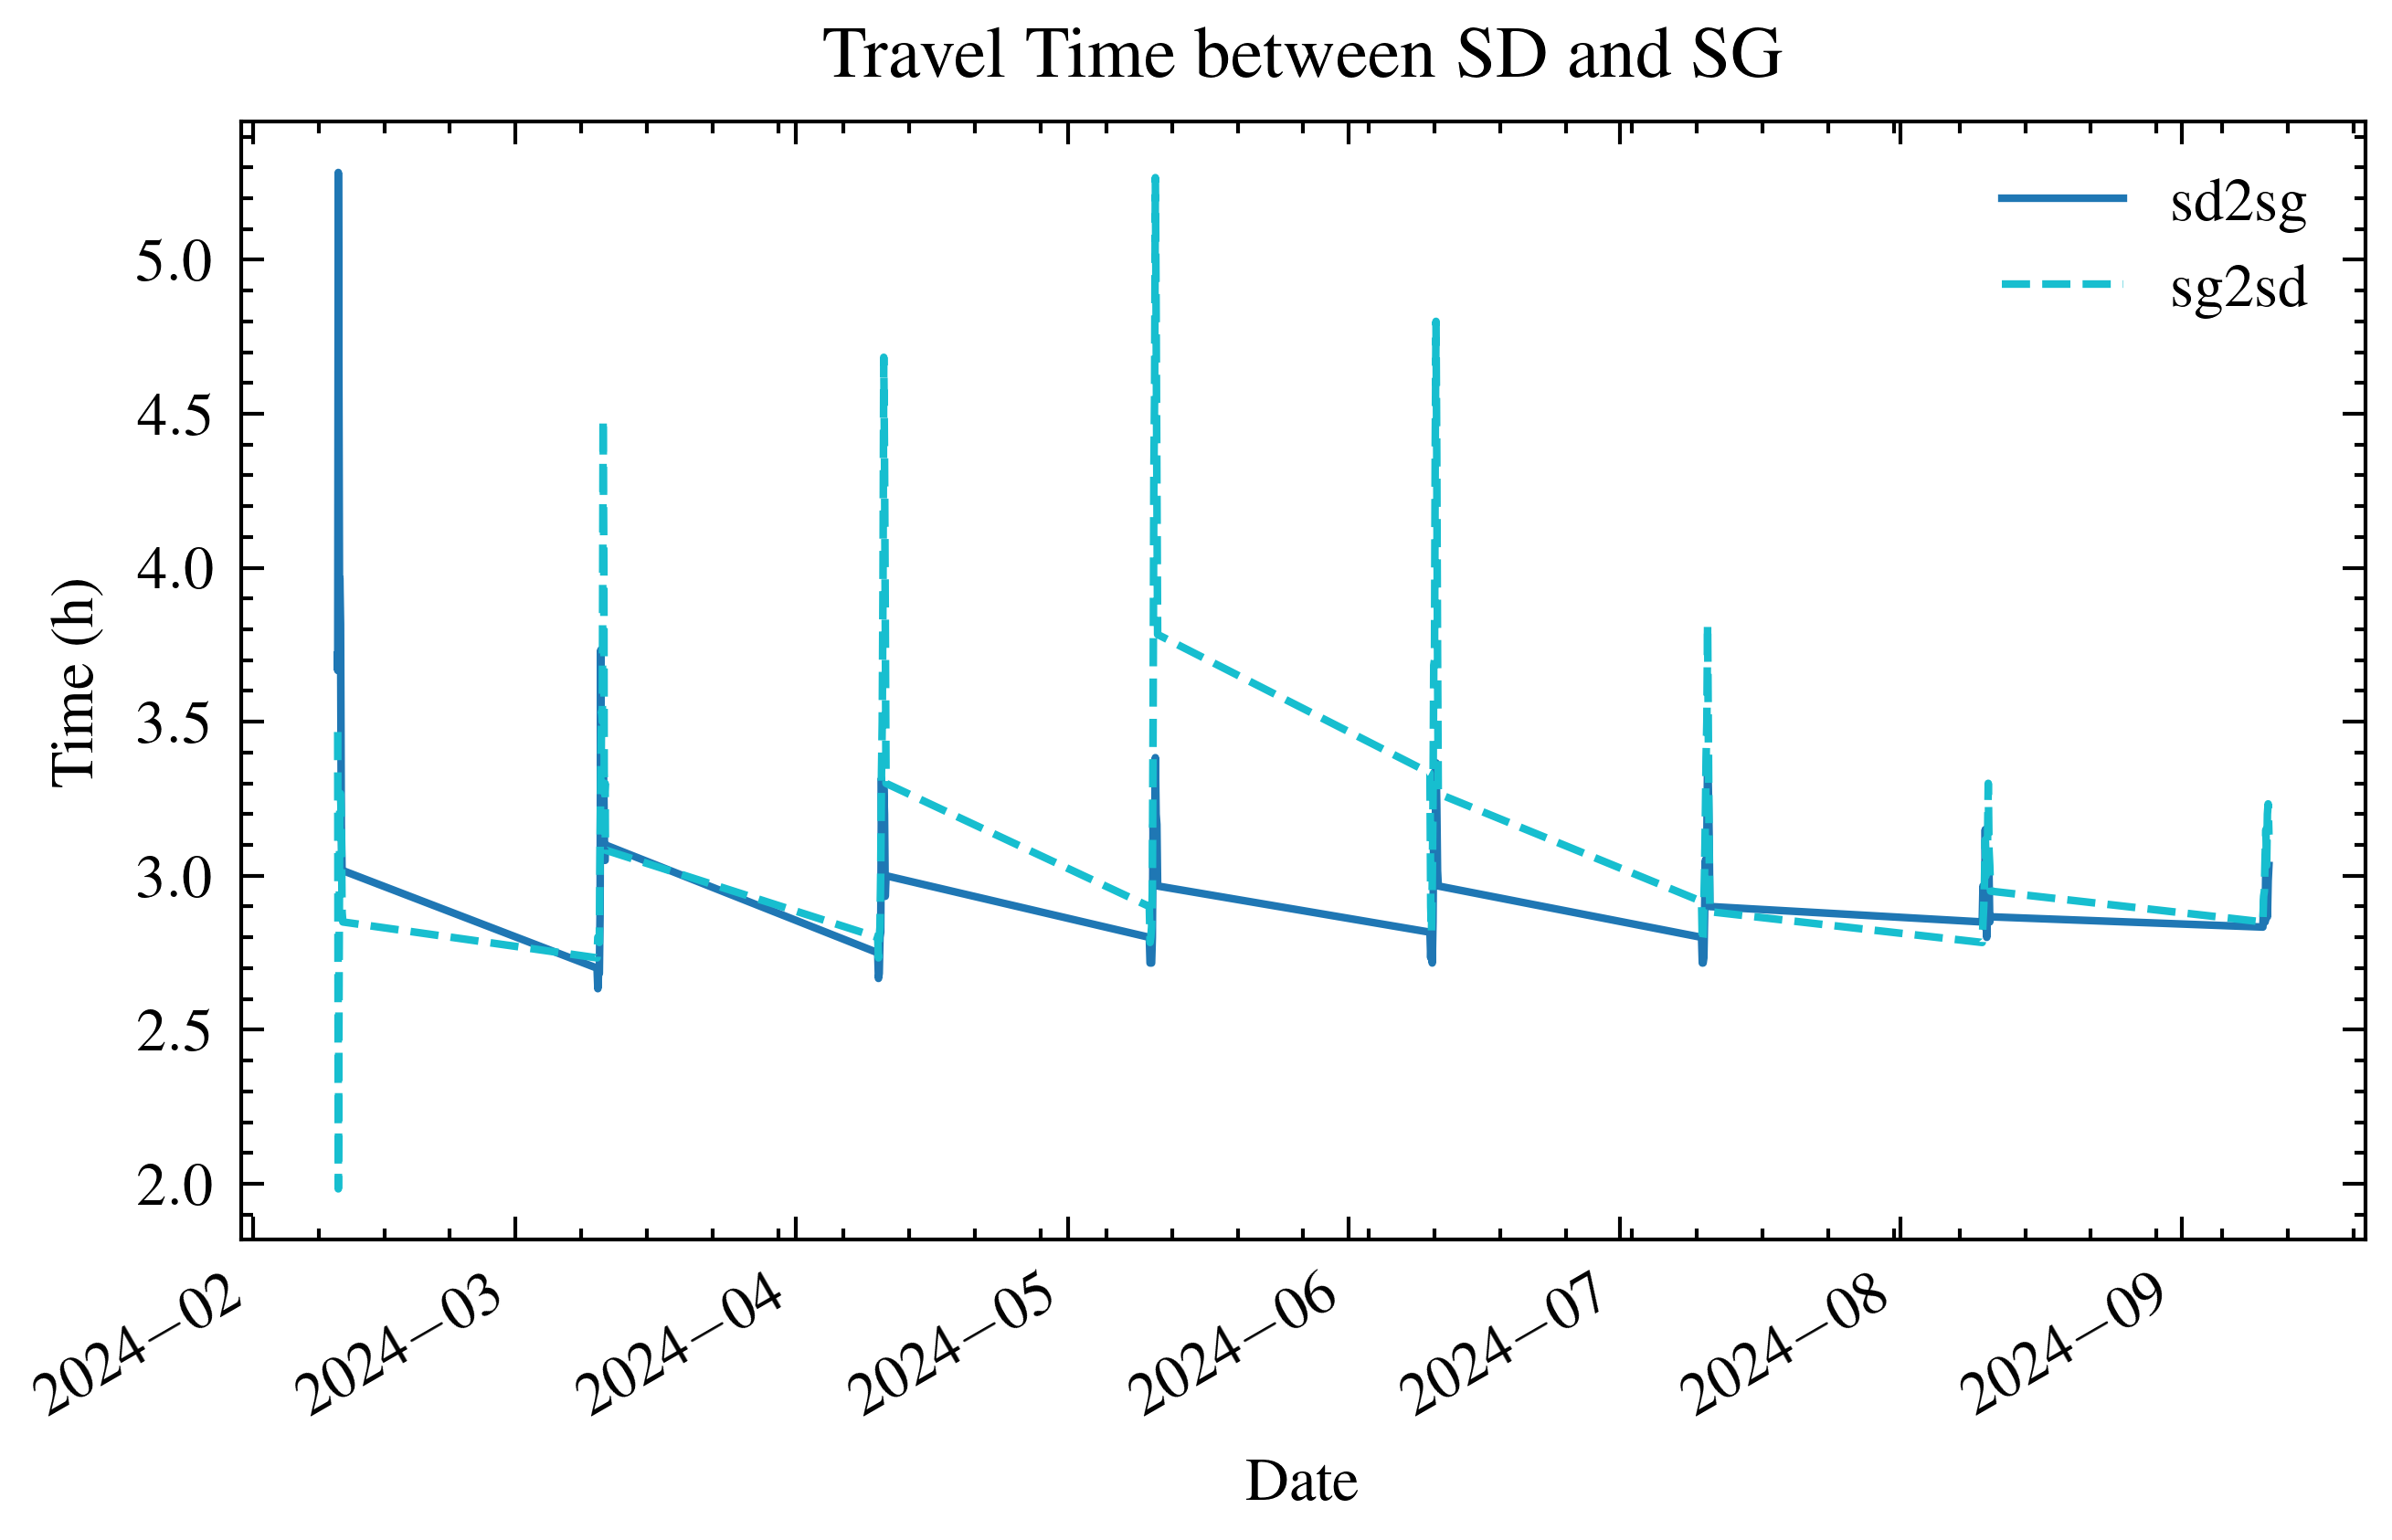

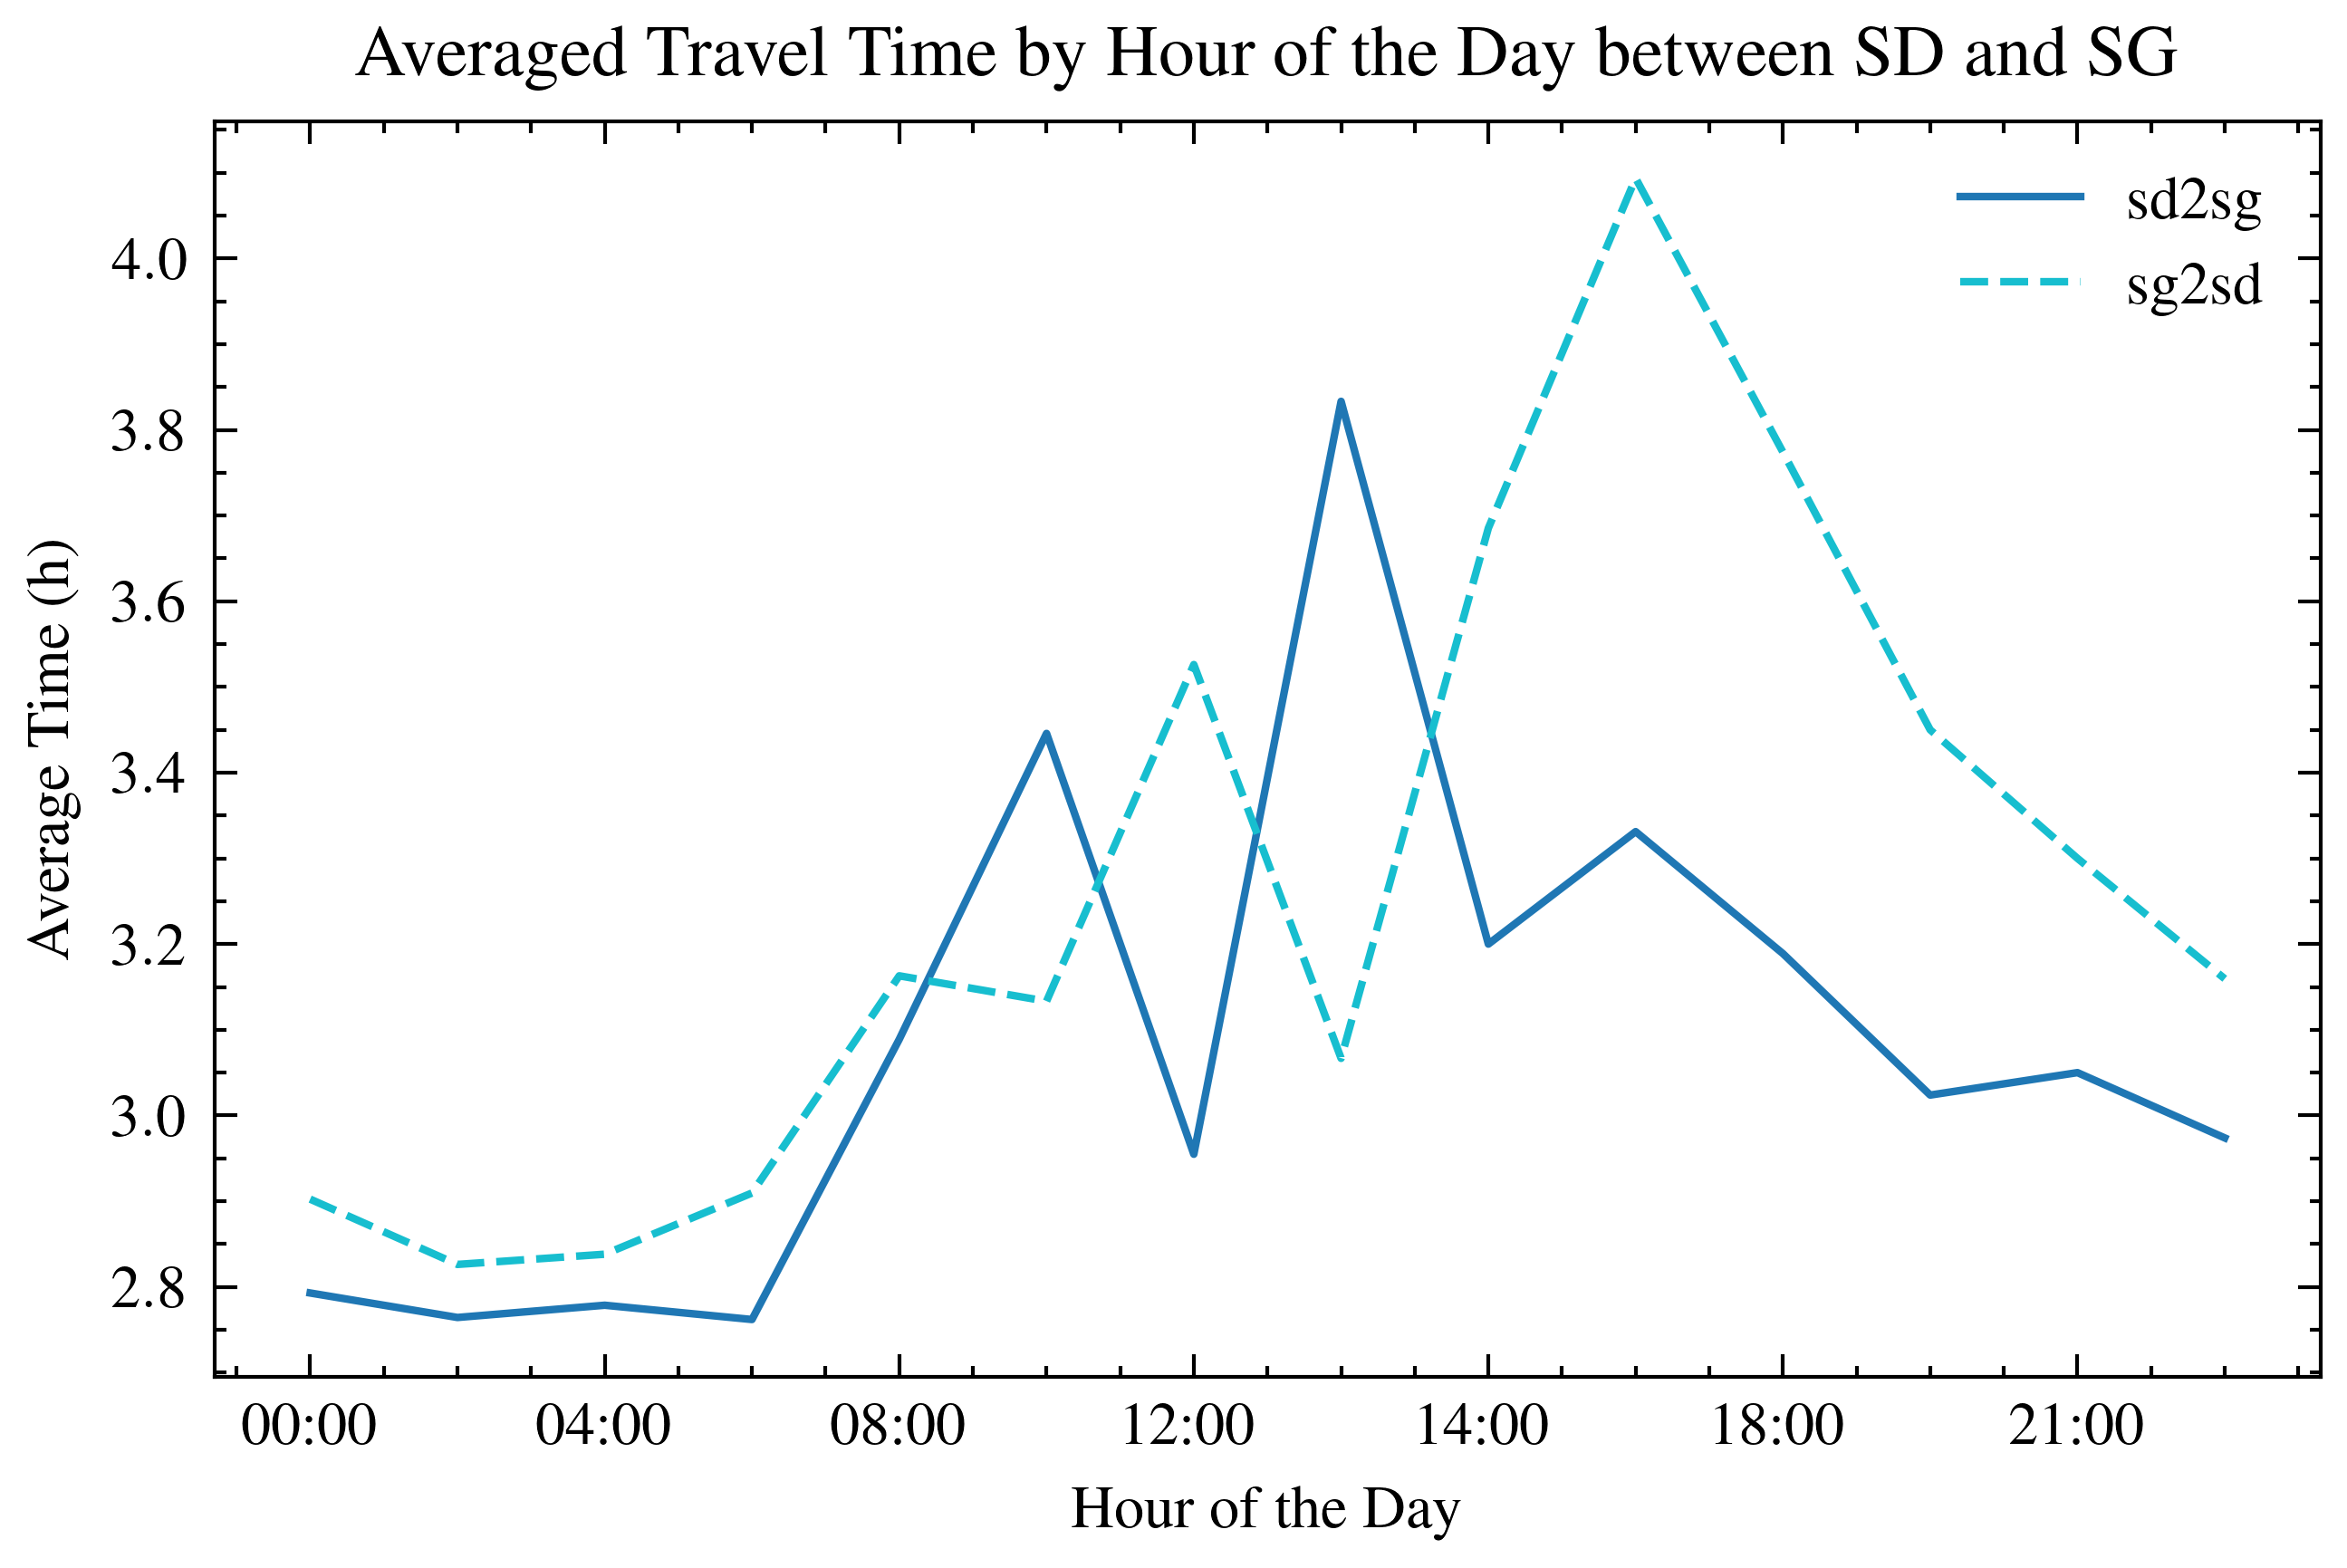

In [61]:
analysis_plot('sd', 'sg')